In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import array, arange, linspace, meshgrid, cos, sin, pi, tan, abs, exp, log, arctan, sqrt, inf
from ipywidgets import interact,fixed
from scipy.integrate import quad, dblquad, tplquad
from IPython.display import display,clear_output
import ipywidgets as widgets

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\R}{\mathbb{R}}$

### Exercise

Sketch the region of integration in the definite integral below and then evaluate it using polar coordinates. 

$$\int_0^1\int_{\sqrt{1-x^2}}^{\sqrt{4-x^2}} x\,dy\,dx + \int_1^2\int_{0}^{\sqrt{4-x^2}} x\,dy\,dx$$
  

#### Solution

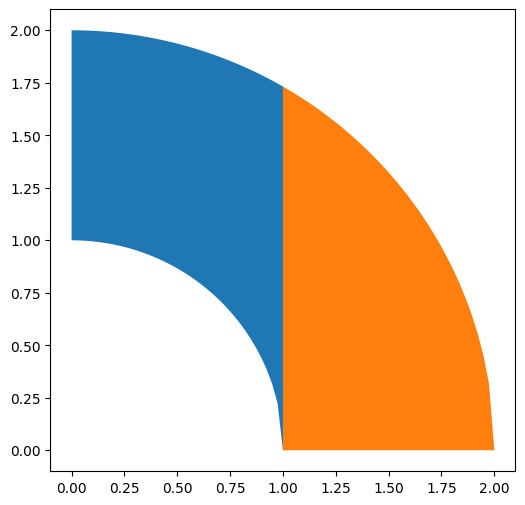

In [2]:
plt.figure(figsize=(6,6))
x = linspace(0,1,40)
plt.fill_between(x,sqrt(4-x**2),sqrt(1-x**2));
xs = linspace(1,2,40)
plt.fill_between(xs,sqrt(4-xs**2));

Just a piece of an annulus.

$$\int_0^{\pi/2} \int_1^2 (r\cos \theta)r \,dr\,d\theta$$

$$ = \left( \sin 
\theta \rvert_0^{\pi/2} \right) \left(\frac{r^3}{3}\big\rvert_1^2\right) = \frac73$$

In [3]:
dblquad(lambda r,t: r**2*cos(t),0,pi/2,1,2) # t first

(2.333333333333333, 2.5905203907920317e-14)

####
<div style="padding-bottom: 40%"></div>

## Examples - Polar Coordinates
  

### Cool Example

Compute $$I = \int_{-\infty}^\infty e^{-x^2}\,dx.$$

#### Solution

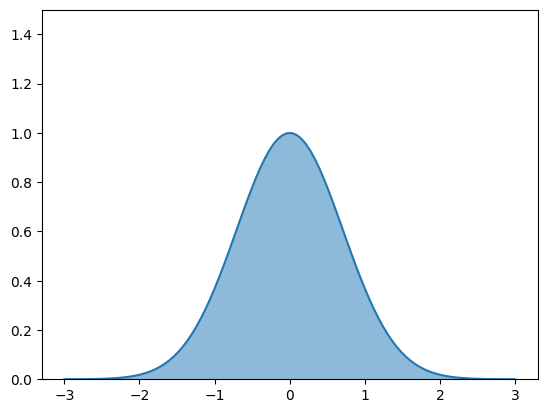

In [4]:
x = linspace(-3,3,100)
plt.fill_between(x,exp(-x**2),alpha=.5)
plt.ylim((0,3/2))
plt.plot(x,exp(-x**2));

We do the trick. 

$$I^2 = \left(\int_{-\infty}^\infty e^{-x^2}\,dx \right)\left(\int_{-\infty}^\infty e^{-y^2}\,dy \right)
$$

$$ = \int_{-\infty}^\infty e^{-x^2} \left(\int_{-\infty}^\infty e^{-y^2}\,dy \right) \,dx
$$

$$ = \int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2}  e^{-y^2}\,dy  \,dx
$$

$$ = \iint_{\mathbb{R}^2} e^{-(x^2+y^2)} \,dA
$$



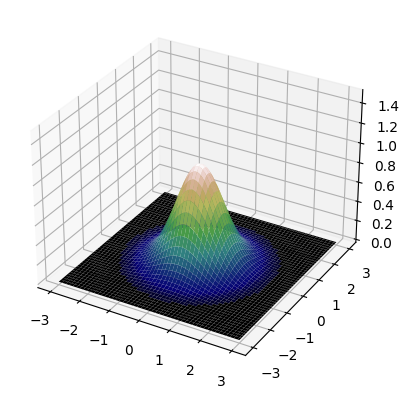

In [5]:
x = y = linspace(-3,3,100)
x,y = meshgrid(x,y)
ax = plt.subplot(projection='3d');
ax.set_zlim((0,3/2))
ax.plot_surface(x,y,exp(-x**2-y**2),cmap='gist_earth');

Then evaluate with polar coordinates.

$$ = \int_0^{2\pi}\int_0^\infty e^{-r^2}r\,dr\,d\theta = \pi$$

so $$I = \sqrt\pi$$

In [6]:
quad(lambda x: exp(-x**2),-inf,inf) # numpy.inf is imported above

(1.7724538509055159, 1.4202636780944923e-08)

In [7]:
sqrt(pi)

1.7724538509055159

####
<div style="padding-bottom: 40%"></div>

### Exercise - Center of Mass

Take the top half of the annulus $\{(x,y) \mid 1 \leq x^2 + y^2 \leq 4\}$. Does this region contain its **centroid** (center of mass with uniform density)?

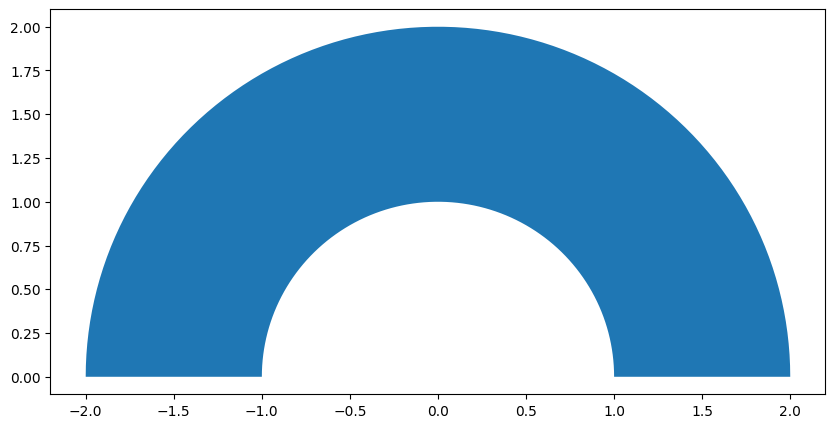

In [8]:
t = np.linspace(0,pi,100)
plt.figure(figsize=(10,5))
plt.fill(np.concatenate([-cos(-t),2*cos(t)]),np.concatenate([sin(t),2*sin(t)]));

#### Solution

For a centroid, we are assuming constant density, so for the purposes of center of mass, we can just assume it is 1. So the mass is the area. 

Symmetry tells us $\bar x = 0$. Further we know the area from simple geometry is $\frac{3\pi}{2}$. 

Thus we need only compute $\bar y$ for which we use polar coordinates.

$$\bar y = \frac{1}{3\pi/2} \int_0^\pi \int_1^2 r^2 \sin \theta \,dr \,d\theta $$

(Don't forget the other $r$ from polar coordinates.)

This is easily evaluated to $\frac{28}{9\pi}$, which is awfully close, but just under, 1. So the centroid is **not** in the region.

In [9]:
area = 3*pi/2

Mx = dblquad(lambda r,t: r**2*sin(t), 0, pi, 1, 2)[0]

Mx / area

0.9902974236829042

####
<div style="padding-bottom: 40%"></div>

### Exercise - Moment of Inertia

Set up integrals to compute the moments of inertia for the annular region above about 

  - the origin
  - the $x$-axis
  - the line $x=-1$.

![The region D spinning abut the z-axis in 3 different configurations.](../img/constant_L.gif)

#### Solution

Around the origin. The distance is $r$. Square it and don't forget the $r$ from polar coordinates

$$\int_0^\pi \int_1^2 r^3 \,dr \,d\theta$$

In [10]:
dblquad(lambda r,t: r**3,0,pi,1,2)[0] # around the origin

11.780972450961725

Around the $x$-axis.  The distance is $y = r \sin \theta$. Square it and don't forget the $r$ from polar coordinates

$$\int_0^\pi \int_1^2 r^3 \sin^2 \theta \,dr \,d\theta$$

In [11]:
dblquad(lambda r,t: r**3*sin(t)**2,0,pi,1,2)[0]

5.890486225480862

Around the line $x=1$.  The distance is $x - (-1) = r \cos \theta + 1$. Square it and don't forget the $r$ from polar coordinates

$$\int_0^\pi \int_1^2 r(r\cos \theta +1)^2 \,dr \,d\theta$$

In [12]:
dblquad(lambda r,t: r*(r*cos(t)+1)**2,0,pi,1,2)[0]

10.602875205865551

####
<div style="padding-bottom: 40%"></div>

<div style="padding-bottom: 40%"></div>

## Example - Probability

Suppose a straw is creased at two random points along its length. What is the probability the three resulting sections can be folded into a triangle?

In [13]:
button = widgets.Button(description='New straw')
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
    v = np.random.rand(2)
    with out:
        # what happens when we press the button
        clear_output()
        @interact(t=(0.,1.))
        def _(t=0):
            v.sort()
            x,y = v

            a = x
            b = y-x
            c = 1-y

            if ((a**2+b**2 - c**2)/(2*a*b))**2 <= 1:
                alpha = np.arccos((a**2+b**2 - c**2)/(2*a*b))
            else:
                alpha=0
            if ((-a**2+b**2 + c**2)/(2*c*b))**2 <= 1:
                beta = np.arccos((-a**2+b**2 + c**2)/(2*c*b))
            else:
                beta=0

            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot(111)
            ax.plot([a+a*cos((1-t)*pi + t * alpha),a,y,y-c*cos((1-t)*pi + t * beta)],[a*sin((1-t)*pi + t * alpha),0,0,c*sin((1-t)*pi + t * beta)])
            ax.set_xlim([-.1,1])
            ax.set_ylim([-.1,1])
            ax.axis('off')
            ax.scatter([x,y],[0,0])
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])

Take the straw to be the unit interval $[0,1]$. We model the points on the straw as two random variables with $ 0 < x < y < 1$. Thus, our joint probability density function $\rho(x,y)$ will be constant on this region and 0 everywhere else. $$ \rho(x,y) = \begin{cases} C & 0 < x < y < 1 \\ 0 & \text{else} \end{cases} $$

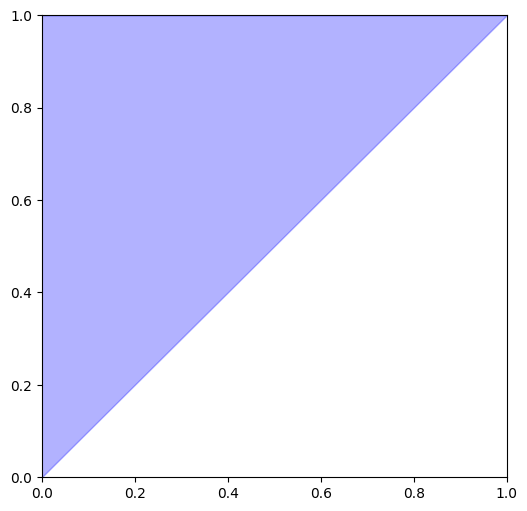

In [14]:
plt.figure(figsize=(6,6))
plt.xlim(0,1)
plt.ylim(0,1)
x = linspace(0,1)
plt.fill_between(x,x,1,alpha=.3,color='b');

To be a probability distribution, we know $\iint \rho\,dA = 1$, so $C = 2$.

Now, we need just integrate $\rho$ over the region in which the straw can be bent into a triangle. This event is just a region in $xy$-space, and we will (cheekily) call it $\Delta$. The key to finding $\Delta$ is simply the triangle inequality: The sum of any two sides must be longer that the third side. 

$$ x + y - x > 1-y$$

$$ y > \frac12 $$

$$  y - x + 1 -y > x$$

$$ \frac12 > x $$

$$  x + 1 - y > y - x$$

$$ y < x + \frac12 $$

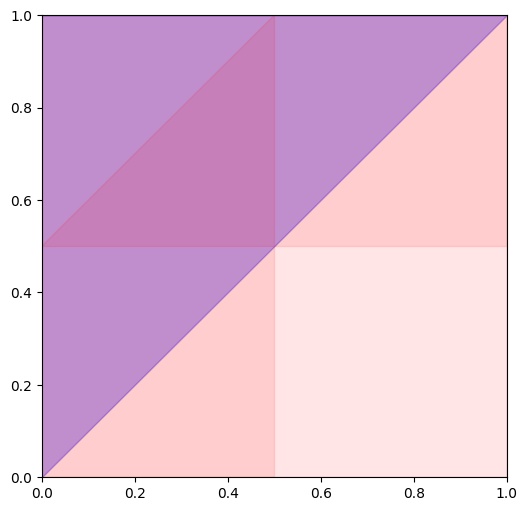

In [15]:
plt.figure(figsize=(6,6))
plt.xlim(0,1)
plt.ylim(0,1)
x = linspace(0,1)
plt.fill_between(x,x,1,alpha=.3,color='b');
plt.fill_between(x,1/2,1,alpha=.1,color='r');
plt.fill_betweenx(x,0,1/2,alpha=.1,color='r');
plt.fill_between(x,x+1/2,alpha=.1,color='r');

So $P(\Delta) = \iint\limits_\Delta \rho \,dA = \iint\limits_\Delta 2\,dA = \frac14$.

You can watch the solution below.

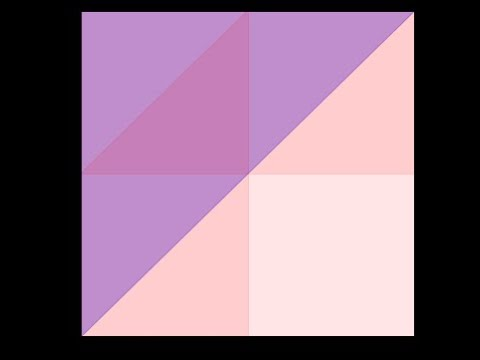

In [16]:
from IPython.display import YouTubeVideo
id='iQ2_OUpGtwY'
YouTubeVideo(id=id,width=800,height=400)